In [1]:
import numpy as np
from array import array
import os
import sys
from Plot_func import SetHisto
from Plot_func import SetGlobalStyle
from Plot_func import SetCanvas
from Plot_func import SetLegend
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.26/06


In [2]:
muon_mass = 0.1056583755 #GeV/c^2
subfix1 = "smearx05y05"
subfix2 = "_aliceseed_elosscorr_MScorr_HelixMSEloss"
subfix3 = "_r05_05"
subfix4 = "_p_0.1_4"
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/"+subfix1+subfix2+subfix4+"/"
png = ".png"
filename = folder+"garlitetest_"+subfix1+subfix2+subfix3+subfix4+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      

In [3]:
hp0test   = ROOT.TH1D( 'hp0test', 'p0 Residuals Seed', 40, -4, 4 )
hp1test   = ROOT.TH1D( 'hp1test', 'p1 Residuals Seed', 40, -4, 4 )
hp2test   = ROOT.TH1D( 'hp2test', 'p2 Residuals Seed', 40, -4, 4 )
hp3test   = ROOT.TH1D( 'hp3test', 'p3 Residuals Seed', 40, -4, 4 )
hp4test   = ROOT.TH1D( 'hp4test', 'p4 Residuals Seed', 40, -4, 4 )

hp0testend   = ROOT.TH1D( 'hp0testend', 'p0 Residuals Seed end', 40,-4,4)
hp1testend   = ROOT.TH1D( 'hp1testend', 'p1 Residuals Seed end', 40,-4,4)
hp2testend   = ROOT.TH1D( 'hp2testend', 'p2 Residuals Seed end', 40,-4,4)
hp3testend   = ROOT.TH1D( 'hp3testend', 'p3 Residuals Seed end', 40,-4,4)
hp4testend   = ROOT.TH1D( 'hp4testend', 'p4 Residuals Seed end', 40,-4,4)

hp0testK   = ROOT.TH1D( 'hp0testK', 'p0 Residuals KF', 40,-4,4)
hp1testK   = ROOT.TH1D( 'hp1testK', 'p1 Residuals KF', 40,-4,4)
hp2testK   = ROOT.TH1D( 'hp2testK', 'p2 Residuals KF', 40,-4,4)
hp3testK   = ROOT.TH1D( 'hp3testK', 'p3 Residuals KF', 40,-4,4)
hp4testK   = ROOT.TH1D( 'hp4testK', 'p4 Residuals KF', 40,-4,4)

hp0testKend   = ROOT.TH1D( 'hp0testKend', 'p0 Residuals KFend', 40,-4,4)
hp1testKend   = ROOT.TH1D( 'hp1testKend', 'p1 Residuals KFend', 40,-4,4)
hp2testKend   = ROOT.TH1D( 'hp2testKend', 'p2 Residuals KFend', 40,-4,4)
hp3testKend   = ROOT.TH1D( 'hp3testKend', 'p3 Residuals KFend', 40,-4,4)
hp4testKend   = ROOT.TH1D( 'hp4testKend', 'p4 Residuals KFend', 40,-4,4)


In [4]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_plane.at(0).Y()
        xMC = t.xyz_plane.at(0).X()
        sinphiMC = t.sinphi_plane.at(0)   
        tanlambdaMC = t.tanlambda_plane.at(0)
        invpTMC = t.invpT_plane.at(0)

        size_MC = t.xyz_plane.size()-1
        yMCend = t.xyz_plane.at(size_MC).Y()
        xMCend = t.xyz_plane.at(size_MC).X()
        sinphiMCend = t.sinphi_plane.at(size_MC)   
        tanlambdaMCend = t.tanlambda_plane.at(size_MC)
        invpTMCend = t.invpT_plane.at(size_MC)
        
        ySeed = t.xyz_seed.Y()
        xSeed = t.xyz_seed.X()
        sinphiSeed= t.sinphi_seed
        tanlambdaSeed=t.tanlambda_seed
        invpTSeed = -t.curvature_seed/(0.5*0.00299792458)

        ySeedend = t.xyz_seed_bkw.Y()
        xSeedend = t.xyz_seed_bkw.X()
        sinphiSeedend= t.sinphi_seed_bkw
        tanlambdaSeedend=t.tanlambda_seed_bkw
        invpTSeedend = -t.curvature_seed_bkw/(0.5*0.00299792458)

        last_n = t.parvect_bkw.size()-1
        y = t.parvect_bkw[last_n][0]
        x = t.parvect_bkw[last_n][1]
        sinphi= t.parvect_bkw[last_n][2]
        tanlambda=t.parvect_bkw[last_n][3]
        invpT = t.parvect_bkw[last_n][4]

        last_n_end = t.parvect.size()-1
        yend = t.parvect[last_n_end][0]
        xend = t.parvect[last_n_end][1]
        sinphiend= t.parvect[last_n_end][2]
        tanlambdaend=t.parvect[last_n_end][3]
        invpTend = t.parvect[last_n_end][4]

        P00 = t.P_seed[0][0]
        P11 = t.P_seed[1][1]
        P22 = t.P_seed[2][2]
        P33 = t.P_seed[3][3]
        P44 = t.P_seed[4][4]

        P00end = t.P_seed_bkw[0][0]
        P11end = t.P_seed_bkw[1][1]
        P22end = t.P_seed_bkw[2][2]
        P33end = t.P_seed_bkw[3][3]
        P44end = t.P_seed_bkw[4][4]

        P00K = t.Pt_bkw[last_n][0][0]
        P11K = t.Pt_bkw[last_n][1][1]
        P22K = t.Pt_bkw[last_n][2][2]
        P33K = t.Pt_bkw[last_n][3][3]
        P44K = t.Pt_bkw[last_n][4][4]

        P00Kend = t.Pt[last_n_end][0][0]
        P11Kend = t.Pt[last_n_end][1][1]
        P22Kend = t.Pt[last_n_end][2][2]
        P33Kend = t.Pt[last_n_end][3][3]
        P44Kend = t.Pt[last_n_end][4][4]
        
        hp0test.Fill((ySeed-yMC)/np.sqrt(P00))
        hp1test.Fill((xSeed-xMC)/np.sqrt(P11))
        hp2test.Fill((sinphiSeed-sinphiMC)/np.sqrt(P22))
        hp3test.Fill((tanlambdaSeed-tanlambdaMC)/np.sqrt(P33))
        hp4test.Fill((invpTSeed-invpTMC)/np.sqrt(P44))

        hp0testend.Fill((ySeedend-yMCend)/np.sqrt(P00end))
        hp1testend.Fill((xSeedend-xMCend)/np.sqrt(P11end))
        hp2testend.Fill((sinphiSeedend-sinphiMCend)/np.sqrt(P22end))
        hp3testend.Fill((tanlambdaSeedend-tanlambdaMCend)/np.sqrt(P33end))
        hp4testend.Fill((invpTSeedend-invpTMCend)/np.sqrt(P44end))

        hp0testK.Fill((y-yMC)/np.sqrt(P00K))
        hp1testK.Fill((x-xMC)/np.sqrt(P11K))
        hp2testK.Fill((sinphi-sinphiMC)/np.sqrt(P22K))
        hp3testK.Fill((tanlambda-tanlambdaMC)/np.sqrt(P33K))
        hp4testK.Fill((invpT-invpTMC)/np.sqrt(P44K))

        hp0testKend.Fill((yend-yMCend)/np.sqrt(P00Kend))
        hp1testKend.Fill((xend-xMCend)/np.sqrt(P11Kend))
        hp2testKend.Fill((sinphiend-sinphiMCend)/np.sqrt(P22Kend))
        hp3testKend.Fill((tanlambdaend-tanlambdaMCend)/np.sqrt(P33Kend))
        hp4testKend.Fill((invpTend-invpTMCend)/np.sqrt(P44Kend))

## Forward


### Seed

 FCN=30.9659 FROM MIGRAD    STATUS=CONVERGED     139 CALLS         140 TOTAL
                     EDM=6.69762e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.19056e+01   2.08148e+00  -1.44068e-02  -2.56423e-04
   2  p1          -6.91072e-02   5.11152e-02   1.54224e-03  -2.90608e-02
   3  p2           1.00274e+00   4.42303e-02   5.52216e-04  -2.18693e-02


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: eps file UnitSeed_p0.eps has been created


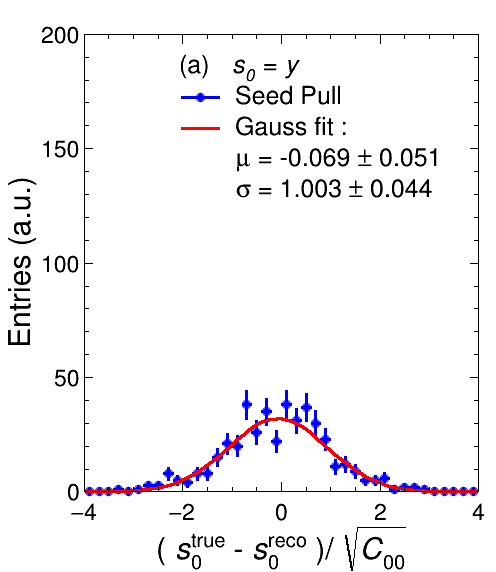

In [5]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus = ROOT.TF1("fgaus", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus.SetParameters(10000,0,1)
fgaus.SetLineWidth(3)
SetHisto(hp0test,";( #it{s}_{0}^{true} - #it{s}_{0}^{reco} )/ #sqrt{#it{C}_{00}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp0test.GetXaxis().SetTitleSize(0.065)
hp0test.GetXaxis().SetTitleOffset(0.95)
hp0test.GetYaxis().SetTitleSize(0.065)
hp0test.GetYaxis().SetTitleOffset(1.2)
hp0test.Fit("fgaus")
legend0 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend0)
legend0.SetTextSize(0.05*0.68*1.6)
legend0.SetHeader("(a)   #it{s_{0}} = #it{y}")
legend0.AddEntry(hp0test," Seed Pull","pl")
legend0.AddEntry(fgaus," Gauss fit :","l")
legend0.AddEntry(0," #mu = "+"%0.3f"%fgaus.GetParameter(1)+" #pm ""%0.3f"% fgaus.GetParError(1),"")
legend0.AddEntry(0," #sigma = "+"%0.3f"%fgaus.GetParameter(2)+" #pm ""%0.3f"% fgaus.GetParError(2),"")
ch0 = ROOT.TCanvas("h0","h0",500,600)
SetCanvas(ch0)
hp0test.Draw("E0")
legend0.Draw()
ch0.Draw()
save="UnitSeed_p0"+".eps"
ch0.Print(save)

 FCN=28.2032 FROM MIGRAD    STATUS=CONVERGED     158 CALLS         159 TOTAL
                     EDM=1.54998e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.19436e+01   2.00405e+00   4.19972e-03   1.22683e-05
   2  p1          -6.48792e-02   5.10866e-02   1.34678e-04   1.02277e-03
   3  p2           1.00943e+00   3.95989e-02   8.29491e-05   2.70105e-04


Info in <TCanvas::Print>: eps file UnitSeed_p1.eps has been created


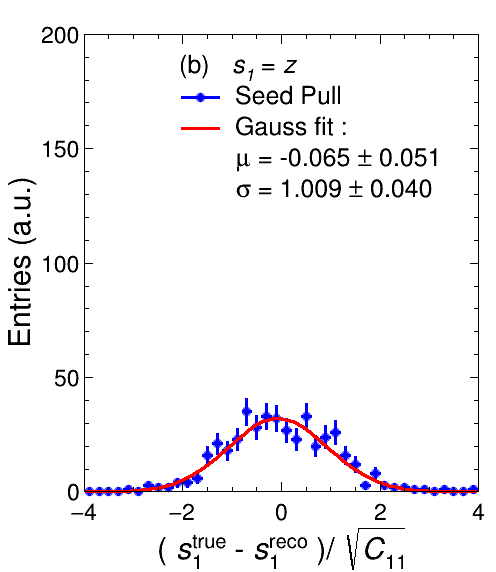

In [6]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus1 = ROOT.TF1("fgaus1", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus1.SetParameters(10000,0,1)
fgaus1.SetLineWidth(3)
SetHisto(hp1test,";( #it{s}_{1}^{true} - #it{s}_{1}^{reco} )/ #sqrt{#it{C}_{11}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp1test.GetXaxis().SetTitleSize(0.065)
hp1test.GetXaxis().SetTitleOffset(0.95)
hp1test.GetYaxis().SetTitleSize(0.065)
hp1test.GetYaxis().SetTitleOffset(1.2)
hp1test.Fit("fgaus1")
legend1 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend1)
legend1.SetTextSize(0.05*0.68*1.6)
legend1.SetHeader("(b)   #it{s_{1}} = #it{z}")
legend1.AddEntry(hp1test," Seed Pull","pl")
legend1.AddEntry(fgaus," Gauss fit :","l")
legend1.AddEntry(0," #mu = "+"%0.3f"%fgaus1.GetParameter(1)+" #pm ""%0.3f"% fgaus1.GetParError(1),"")
legend1.AddEntry(0," #sigma = "+"%0.3f"%fgaus1.GetParameter(2)+" #pm ""%0.3f"% fgaus1.GetParError(2),"")
ch1 = ROOT.TCanvas("h1","h1",500,600)
SetCanvas(ch1)
hp1test.Draw("E0")
legend1.Draw()
ch1.Draw()
save="UnitSeed_p1"+".eps"
ch1.Print(save)

 FCN=18.7365 FROM MIGRAD    STATUS=CONVERGED     144 CALLS         145 TOTAL
                     EDM=1.7171e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.53110e+01   2.19883e+00  -4.64992e-03   8.24361e-05
   2  p1          -1.33756e-02   5.01375e-02   2.55753e-05   2.03501e-03
   3  p2           9.43342e-01   3.99993e-02  -3.18791e-05   8.04852e-03


Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitSeed_p2.eps has been created


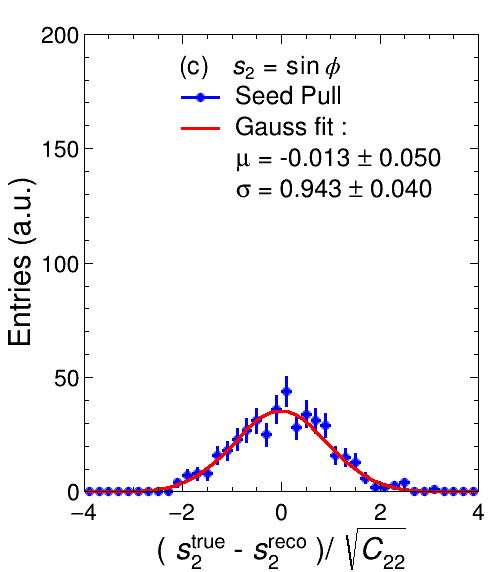

In [7]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus2 = ROOT.TF1("fgaus2", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus2.SetParameters(10000,0,1)
fgaus2.SetLineWidth(3)
SetHisto(hp2test,";( #it{s}_{2}^{true} - #it{s}_{2}^{reco} )/ #sqrt{#it{C}_{22}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp2test.GetXaxis().SetTitleSize(0.065)
hp2test.GetXaxis().SetTitleOffset(0.95)
hp2test.GetYaxis().SetTitleSize(0.065)
hp2test.GetYaxis().SetTitleOffset(1.2)
hp2test.Fit("fgaus2")
legend2 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend2)
legend2.SetTextSize(0.05*0.68*1.6)
legend2.SetHeader("(\\text{c}) \ {s}_{2} = \sin{\phi}")
legend2.AddEntry(hp2test," Seed Pull","pl")
legend2.AddEntry(fgaus2," Gauss fit :","l")
legend2.AddEntry(0," #mu = "+"%0.3f"%fgaus2.GetParameter(1)+" #pm ""%0.3f"% fgaus2.GetParError(1),"")
legend2.AddEntry(0," #sigma = "+"%0.3f"%fgaus2.GetParameter(2)+" #pm ""%0.3f"% fgaus2.GetParError(2),"")
ch2 = ROOT.TCanvas("h2","h2",500,600)
SetCanvas(ch2)
hp2test.Draw("E0")
legend2.Draw()
ch2.Draw()
save=folder+"UnitSeed_p2"+".eps"
ch2.Print(save)

 FCN=19.0422 FROM MIGRAD    STATUS=CONVERGED     336 CALLS         337 TOTAL
                     EDM=5.82763e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.00539e+01   2.51815e+00   1.15849e-02  -7.21186e-05
   2  p1          -2.42789e-02   4.09578e-02  -2.50953e-05   7.60246e-04
   3  p2           0.00000e+00   1.75975e+00  -0.00000e+00   0.00000e+00
   4  p3           8.20309e-01   3.24377e-02   3.25526e-05   4.57034e-03


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitSeed_p3.eps has been created


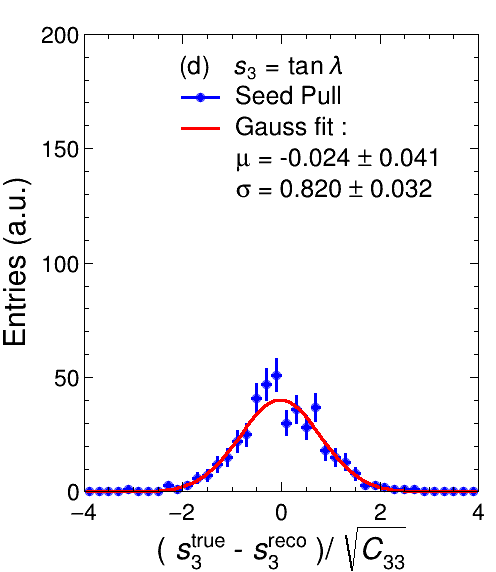

In [8]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus3 = ROOT.TF1("fgaus3", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus3.SetParameters(100,0,1)
fgaus3.SetParLimits(3,0.5,10)
fgaus3.SetParLimits(1,-1,1)
fgaus3.SetLineWidth(3)
SetHisto(hp3test,";( #it{s}_{3}^{true} - #it{s}_{3}^{reco} )/ #sqrt{#it{C}_{33}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp3test.GetXaxis().SetTitleSize(0.065)
hp3test.GetXaxis().SetTitleOffset(0.95)
hp3test.GetYaxis().SetTitleSize(0.065)
hp3test.GetYaxis().SetTitleOffset(1.3)
hp3test.Fit("fgaus3")
legend3 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend3)
legend3.SetTextSize(0.05*0.68*1.6)
legend3.SetHeader("(\\text{d})\ s_{3} = \\tan{\lambda}")
legend3.AddEntry(hp3test," Seed Pull","pl")
legend3.AddEntry(fgaus," Gauss fit :","l")
legend3.AddEntry(0," #mu = "+"%0.3f"%fgaus3.GetParameter(1)+" #pm ""%0.3f"% fgaus3.GetParError(1),"")
legend3.AddEntry(0," #sigma = "+"%0.3f"%fgaus3.GetParameter(3)+" #pm ""%0.3f"% fgaus3.GetParError(3),"")
ch3 = ROOT.TCanvas("h3","h3",500,600)
SetCanvas(ch3)
hp3test.Draw("E0")
legend3.Draw()
ch3.Draw()
save=folder+"UnitSeed_p3"+".eps"
ch3.Print(save)

 FCN=31.9203 FROM MIGRAD    STATUS=CONVERGED     328 CALLS         329 TOTAL
                     EDM=4.67043e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.28063e+01   2.09107e+00  -1.18293e-02   9.39932e-05
   2  p1           2.51838e-02   5.08622e-02   1.15128e-04   3.59295e-03
   3  p2           0.00000e+00   1.75139e+00  -0.00000e+00   0.00000e+00
   4  p3           9.78843e-01   4.06253e-02  -1.80489e-04   1.16760e-02


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitSeed_p4.eps has been created


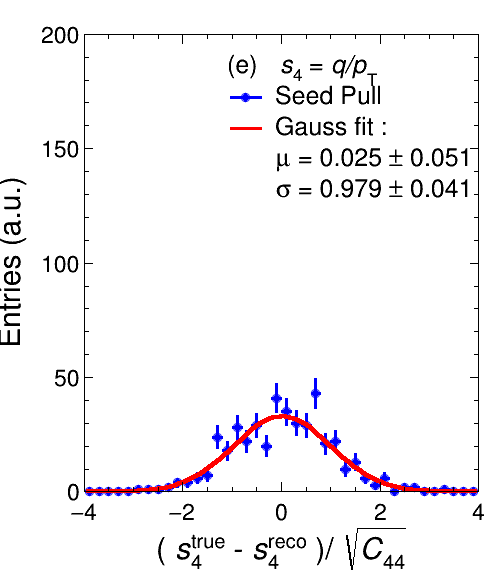

In [9]:
gStyle.SetOptStat(0)
SetGlobalStyle()

fgaus4 = ROOT.TF1("fgaus4", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus4.SetParameters(100,0,1)
fgaus4.SetParLimits(3,0.5,10)
fgaus4.SetParLimits(1,-1,1)
fgaus4.SetLineWidth(4)
SetHisto(hp4test,";( #it{s}_{4}^{true} - #it{s}_{4}^{reco} )/ #sqrt{#it{C}_{44}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp4test.GetXaxis().SetTitleSize(0.065)
hp4test.GetXaxis().SetTitleOffset(0.95)
hp4test.GetYaxis().SetTitleSize(0.065)
hp4test.GetYaxis().SetTitleOffset(1.4)
hp4test.Fit("fgaus4")
legend4 = ROOT.TLegend(0.45,0.64,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(e)   #it{s}_{4} = #it{q/p}_{T} ")
legend4.AddEntry(hp4test," Seed Pull","pl")
legend4.AddEntry(fgaus," Gauss fit :","l")
legend4.AddEntry(0," #mu = "+"%0.3f"%fgaus4.GetParameter(1)+" #pm ""%0.3f"% fgaus4.GetParError(1),"")
legend4.AddEntry(0," #sigma = "+"%0.3f"%fgaus4.GetParameter(3)+" #pm ""%0.3f"% fgaus4.GetParError(3),"")
ch4 = ROOT.TCanvas("h4","h4",500,600)
SetCanvas(ch4)
hp4test.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"UnitSeed_p4"+".eps"
ch4.Print(save)

### KF

 FCN=36.712 FROM MIGRAD    STATUS=CONVERGED     144 CALLS         145 TOTAL
                     EDM=3.86367e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.22502e+01   1.99386e+00   4.87000e-03  -4.25360e-06
   2  p1          -4.71583e-02   5.17516e-02   1.52630e-04   1.55362e-03
   3  p2           9.82435e-01   3.73375e-02   9.01495e-05   1.26533e-03


 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 12 (Thread 0x725c2bbcd640 (LWP 430809) "python3"):
#0  __futex_abstimed_wait_common64 (private=-866202224, cancel=true, abstime=0x725c2bbcc310, op=137, expected=0, futex_word=0x58e9caa50c6c <_PyRuntime+428>) at ./nptl/futex-internal.c:57
#1  __futex_abstimed_wait_common (cancel=true, private=-866202224, abstime=0x725c2bbcc310, clockid=-899647941, expected=0, futex_word=0x58e9caa50c6c <_PyRuntime+428>) at ./nptl/futex-internal.c:87
#2  __GI___futex_abstimed_wait_cancelable64 (futex_word=futex_word
entry=0x58e9caa50c6c <_PyRuntime+428>, expected=expected
entry=0, clockid=clockid
entry=1, abstime=abstime
entry=0x725c2bbcc310, private=private
entry=0) at ./nptl/futex-internal.c:139
#3  0x0000725c71693e9b in __pthread_cond_wait_common (abstime=0x725c2bbcc310, clockid=1, mutex=0x58e9caa50c70 <_PyRuntime+432>, cond=0x58e9caa50c40 <_PyRuntime+384>) at ./nptl/pthread_cond_wait.c:50

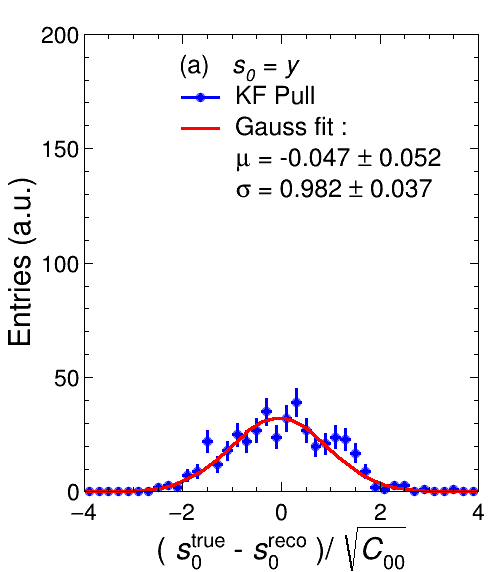

In [10]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus = ROOT.TF1("fgaus", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus.SetParameters(10000,0,1)
fgaus.SetLineWidth(3)
SetHisto(hp0testKend,";( #it{s}_{0}^{true} - #it{s}_{0}^{reco} )/ #sqrt{#it{C}_{00}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp0testKend.GetXaxis().SetTitleSize(0.065)
hp0testKend.GetXaxis().SetTitleOffset(0.95)
hp0testKend.GetYaxis().SetTitleSize(0.065)
hp0testKend.GetYaxis().SetTitleOffset(1.2)
hp0testKend.Fit("fgaus")
legend0 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend0)
legend0.SetTextSize(0.05*0.68*1.6)
legend0.SetHeader("(a)   #it{s_{0}} = #it{y}")
legend0.AddEntry(hp0testKend," KF Pull","pl")
legend0.AddEntry(fgaus," Gauss fit :","l")
legend0.AddEntry(0," #mu = "+"%0.3f"%fgaus.GetParameter(1)+" #pm ""%0.3f"% fgaus.GetParError(1),"")
legend0.AddEntry(0," #sigma = "+"%0.3f"%fgaus.GetParameter(2)+" #pm ""%0.3f"% fgaus.GetParError(2),"")
ch0 = ROOT.TCanvas("h0","h0",500,600)
SetCanvas(ch0)
hp0testKend.Draw("E0")
legend0.Draw()
ch0.Draw()
save=folder+"UnitKFEnd_p0"+".eps"
ch0.Print(save)

 FCN=29.9777 FROM MIGRAD    STATUS=CONVERGED     114 CALLS         115 TOTAL
                     EDM=5.5724e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.39584e+01   2.16247e+00  -1.46036e-03   8.07790e-04
   2  p1           1.45570e-02   4.73314e-02   5.62775e-03   9.56217e-04
   3  p2           9.40911e-01   3.75402e-02   1.15966e-04   4.44158e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitKFEnd_p1.eps has been created


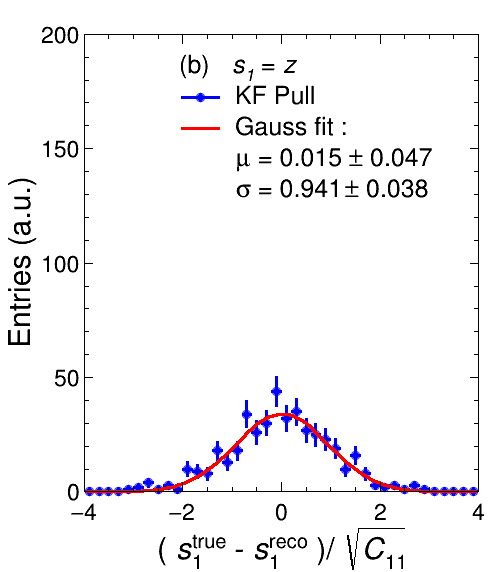

In [11]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus1 = ROOT.TF1("fgaus1", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus1.SetParameters(10000,0,1)
fgaus1.SetLineWidth(3)
SetHisto(hp1testKend,";( #it{s}_{1}^{true} - #it{s}_{1}^{reco} )/ #sqrt{#it{C}_{11}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp1testKend.GetXaxis().SetTitleSize(0.065)
hp1testKend.GetXaxis().SetTitleOffset(0.95)
hp1testKend.GetYaxis().SetTitleSize(0.065)
hp1testKend.GetYaxis().SetTitleOffset(1.2)
hp1testKend.Fit("fgaus1")
legend1 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend1)
legend1.SetTextSize(0.05*0.68*1.6)
legend1.SetHeader("(b)   #it{s_{1}} = #it{z}")
legend1.AddEntry(hp1test," KF Pull","pl")
legend1.AddEntry(fgaus1," Gauss fit :","l")
legend1.AddEntry(0," #mu = "+"%0.3f"%fgaus1.GetParameter(1)+" #pm ""%0.3f"% fgaus1.GetParError(1),"")
legend1.AddEntry(0," #sigma = "+"%0.3f"%fgaus1.GetParameter(2)+" #pm ""%0.3f"% fgaus1.GetParError(2),"")
ch1 = ROOT.TCanvas("h1","h1",500,600)
SetCanvas(ch1)
hp1testKend.Draw("E0")
legend1.Draw()
ch1.Draw()
save=folder+"UnitKFEnd_p1"+".eps"
ch1.Print(save)

 FCN=37.5724 FROM MIGRAD    STATUS=CONVERGED     130 CALLS         131 TOTAL
                     EDM=1.68628e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.94783e+01   1.89953e+00   1.67120e-03   1.66268e-04
   2  p1          -4.88200e-02   5.50974e-02  -8.79827e-05   1.36064e-04
   3  p2           1.05958e+00   4.40171e-02  -5.34595e-05   3.82868e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitKFEnd_p2.eps has been created


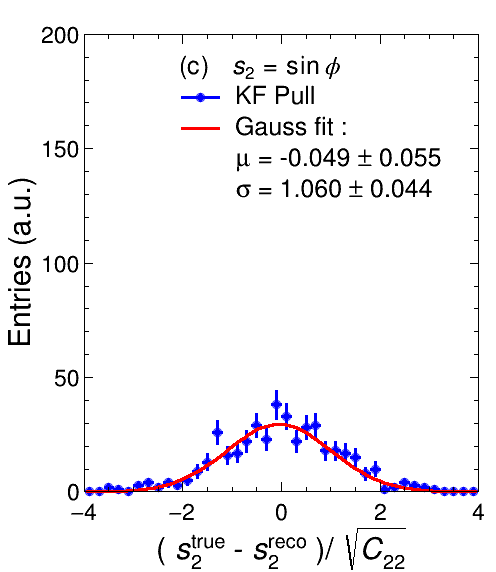

In [12]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus2 = ROOT.TF1("fgaus2", "[0]*TMath::Gaus(x,[1],[2])", -4, 4)
fgaus2.SetParameters(10000,0,1)
fgaus2.SetLineWidth(3)
SetHisto(hp2testKend,";( #it{s}_{2}^{true} - #it{s}_{2}^{reco} )/ #sqrt{#it{C}_{22}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp2testKend.GetXaxis().SetTitleSize(0.065)
hp2testKend.GetXaxis().SetTitleOffset(0.95)
hp2testKend.GetYaxis().SetTitleSize(0.065)
hp2testKend.GetYaxis().SetTitleOffset(1.2)
hp2testKend.Fit("fgaus2")
legend2 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend2)
legend2.SetTextSize(0.05*0.68*1.6)
legend2.SetHeader("(\\text{c}) \ {s}_{2} = \sin{\phi}")
legend2.AddEntry(hp2test," KF Pull","pl")
legend2.AddEntry(fgaus2," Gauss fit :","l")
legend2.AddEntry(0," #mu = "+"%0.3f"%fgaus2.GetParameter(1)+" #pm ""%0.3f"% fgaus2.GetParError(1),"")
legend2.AddEntry(0," #sigma = "+"%0.3f"%fgaus2.GetParameter(2)+" #pm ""%0.3f"% fgaus2.GetParError(2),"")
ch2 = ROOT.TCanvas("h2","h2",500,600)
SetCanvas(ch2)
hp2testKend.Draw("E0")
legend2.Draw()
ch2.Draw()
save=folder+"UnitKFEnd_p2"+".eps"
ch2.Print(save)

 FCN=24.2229 FROM MIGRAD    STATUS=CONVERGED     302 CALLS         303 TOTAL
                     EDM=9.10486e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.32614e+01   2.07465e+00   2.64759e-03   7.58301e-07
   2  p1          -3.33268e-02   5.09937e-02   5.93063e-05   9.58406e-04
   3  p2           0.00000e+00   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           9.83634e-01   3.94342e-02  -1.82394e-05  -1.25770e-03


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitKFEnd_p3.eps has been created


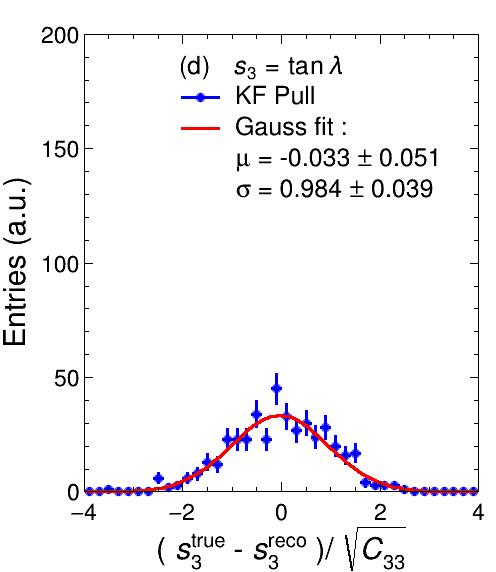

In [13]:
gStyle.SetOptStat(0)
SetGlobalStyle()


fgaus3 = ROOT.TF1("fgaus3", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus3.SetParameters(100,0,1)
fgaus3.SetParLimits(3,0.5,10)
fgaus3.SetParLimits(1,-1,1)
fgaus3.SetLineWidth(3)
SetHisto(hp3testKend,";( #it{s}_{3}^{true} - #it{s}_{3}^{reco} )/ #sqrt{#it{C}_{33}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp3testKend.GetXaxis().SetTitleSize(0.065)
hp3testKend.GetXaxis().SetTitleOffset(0.95)
hp3testKend.GetYaxis().SetTitleSize(0.065)
hp3testKend.GetYaxis().SetTitleOffset(1.3)
hp3testKend.Fit("fgaus3")
legend3 = ROOT.TLegend(0.35,0.64,0.96,0.91)
SetLegend(legend3)
legend3.SetTextSize(0.05*0.68*1.6)
legend3.SetHeader("(\\text{d})\ s_{3} = \\tan{\lambda}")
legend3.AddEntry(hp3test," KF Pull","pl")
legend3.AddEntry(fgaus," Gauss fit :","l")
legend3.AddEntry(0," #mu = "+"%0.3f"%fgaus3.GetParameter(1)+" #pm ""%0.3f"% fgaus3.GetParError(1),"")
legend3.AddEntry(0," #sigma = "+"%0.3f"%fgaus3.GetParameter(3)+" #pm ""%0.3f"% fgaus3.GetParError(3),"")
ch3 = ROOT.TCanvas("h3","h3",500,600)
SetCanvas(ch3)
hp3testKend.Draw("E0")
legend3.Draw()
ch3.Draw()
save=folder+"UnitKFEnd_p3"+".eps"
ch3.Print(save)

 FCN=15.1577 FROM MIGRAD    STATUS=CONVERGED     300 CALLS         301 TOTAL
                     EDM=6.79092e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.01199e+01   1.94678e+00   1.24292e-02  -5.06008e-04
   2  p1           7.82011e-02   5.75837e-02   5.12055e-04   1.48381e-02
   3  p2           0.00000e+00   1.75326e+00  -0.00000e+00   0.00000e+00
   4  p3           1.11138e+00   5.16805e-02   1.63032e-05  -7.63154e-02


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/UnitKFEnd_p4.eps has been created


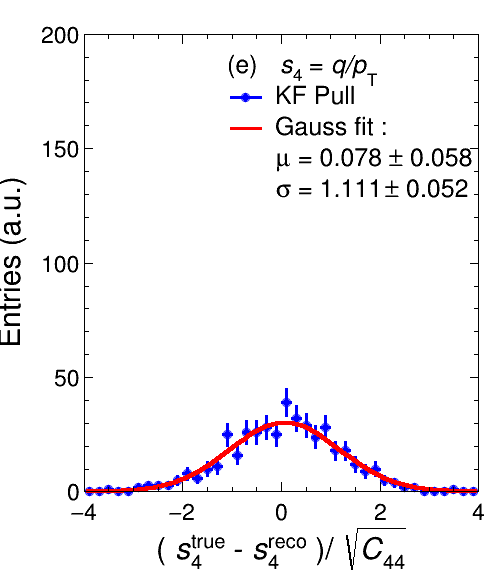

In [14]:
gStyle.SetOptStat(0)
SetGlobalStyle()

fgaus4 = ROOT.TF1("fgaus4", "[0]*TMath::Gaus(x,[1],[3])", -10, 10)
# fgaus4.SetParameters(100,0,1)
fgaus4.SetParLimits(3,0.5,10)
fgaus4.SetParLimits(1,-1,1)
fgaus4.SetLineWidth(4)
SetHisto(hp4testKend,";( #it{s}_{4}^{true} - #it{s}_{4}^{reco} )/ #sqrt{#it{C}_{44}};Entries (a.u.)",ROOT.kBlue,20,[0,200])
hp4testKend.GetXaxis().SetTitleSize(0.065)
hp4testKend.GetXaxis().SetTitleOffset(0.95)
hp4testKend.GetYaxis().SetTitleSize(0.065)
hp4testKend.GetYaxis().SetTitleOffset(1.4)
hp4testKend.Fit("fgaus4")
legend4 = ROOT.TLegend(0.45,0.64,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(e)   #it{s}_{4} = #it{q/p}_{T} ")
legend4.AddEntry(hp4test," KF Pull","pl")
legend4.AddEntry(fgaus," Gauss fit :","l")
legend4.AddEntry(0," #mu = "+"%0.3f"%fgaus4.GetParameter(1)+" #pm ""%0.3f"% fgaus4.GetParError(1),"")
legend4.AddEntry(0," #sigma = "+"%0.3f"%fgaus4.GetParameter(3)+" #pm ""%0.3f"% fgaus4.GetParError(3),"")
ch4 = ROOT.TCanvas("h4","h4",500,600)
SetCanvas(ch4)
hp4testKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"UnitKFEnd_p4"+".eps"
ch4.Print(save)

## Backward

### Seed

In [15]:
# gStyle.SetOptFit(1)
# c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
# #gPad.SetLogy()
# hp0testend.SetTitle("p0 testend;(p0_{reco}-p0_{MC})/#sqrt{P00};n_ev")
# hp0testend.Draw()
# hp0testend.Fit("gaus")
# c0s.Draw()
# save=folder+"helixend_"+"Residp0"+subfix1+subfix2+subfix3+png
# c0s.Print(save)

# c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
# #gPad.SetLogy()
# hp1testend.SetTitle("p1 testend;(p1_{reco}-p1_{MC})/#sqrt{P11};n_ev")
# hp1testend.Draw()
# hp1testend.Fit("gaus")
# c1s.Draw()
# save=folder+"helixend_"+"Residp1"+subfix1+subfix2+subfix3+png
# c1s.Print(save)

# c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
# #gPad.SetLogy()
# hp2testend.SetTitle("p2 testend;(p2_{reco}-p2_{MC})/#sqrt{P22};n_ev")
# hp2testend.Draw()
# hp2testend.Fit("gaus")
# c2s.Draw()
# save=folder+"helixend_"+"Residp2"+subfix1+subfix2+subfix3+png
# c2s.Print(save)

# c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
# #gPad.SetLogy()
# hp3testend.SetTitle("p3 testend;(p3_{reco}-p3_{MC})/#sqrt{P33};n_ev")
# hp3testend.Draw()
# gStyle.SetOptFit(1)
# hp3testend.Fit("gaus")
# c3s.Draw()
# save=folder+"helixend_"+"Residp3"+subfix1+subfix2+subfix3+png
# c3s.Print(save)

# c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
# #gPad.SetLogy()
# hp4testend.SetTitle("p4 testend;(p4_{reco}-p4_{MC})/#sqrt{P44};n_ev")
# hp4testend.Fit("gaus")
# hp4testend.Draw()
# c4s.Draw()
# save=folder+"helixend_"+"Residp4"+subfix1+subfix2+subfix3+png
# c4s.Print(save)

### KF

In [16]:
# gStyle.SetOptFit(1)
# c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
# #gPad.SetLogy()
# hp0testK.SetTitle("p0 test;(p0_{reco}-p0_{MC})/#sqrt{P00};n_ev")
# hp0testK.Draw()
# hp0testK.Fit("gaus")
# c0s.Draw()
# save=folder+"KF_"+"Residp0"+subfix1+subfix2+subfix3+png
# c0s.Print(save)

# c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
# #gPad.SetLogy()
# hp1testK.SetTitle("p1 test;(p1_{reco}-p1_{MC})/#sqrt{P11};n_ev")
# hp1testK.Draw()
# hp1testK.Fit("gaus")
# c1s.Draw()
# save=folder+"KF_"+"Residp1"+subfix1+subfix2+subfix3+png
# c1s.Print(save)

# c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
# #gPad.SetLogy()
# hp2testK.SetTitle("p2 test;(p2_{reco}-p2_{MC})/#sqrt{P22};n_ev")
# hp2testK.Draw()
# c2s.Draw()
# hp2testK.Fit("gaus")
# save=folder+"KF_"+"Residp2"+subfix1+subfix2+subfix3+png
# c2s.Print(save)

# c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
# #gPad.SetLogy()
# hp3testK.SetTitle("p3 test;(p3_{reco}-p3_{MC})/#sqrt{P33};n_ev")
# hp3testK.Draw()
# gStyle.SetOptFit(1)
# hp3testK.Fit("gaus")
# c3s.Draw()
# save=folder+"KF_"+"Residp3"+subfix1+subfix2+subfix3+png
# c3s.Print(save)

# c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
# #gPad.SetLogy()
# hp4testK.SetTitle("p4 test;(p4_{reco}-p4_{MC})/#sqrt{P44};n_ev")
# hp4testK.Fit("gaus")
# hp4testK.Draw()
# c4s.Draw()
# save=folder+"KF_"+"Residp4"+subfix1+subfix2+subfix3+png
# c4s.Print(save)